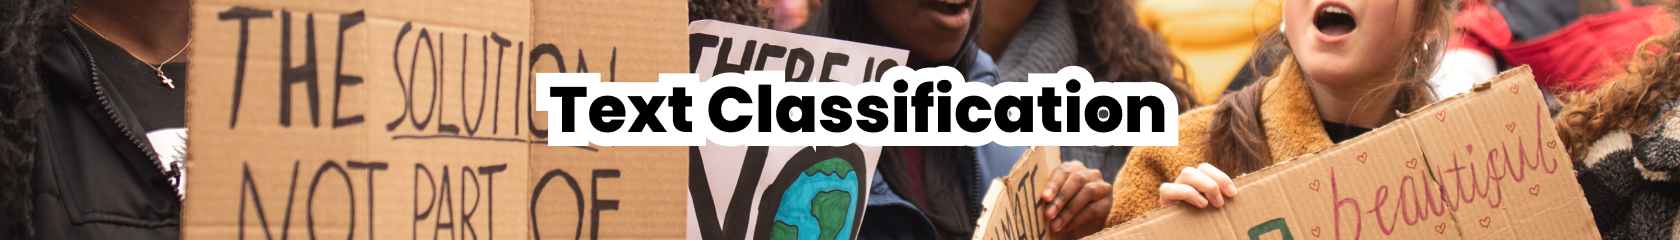

# Identitas

---

Nama: Nanda Lidya Fadillah

---

No. Registrasi: 1494037162100-195

---

# Pendahuluan
Berikut ini merupakan klasifikasi text dengan menggunakan LSTM dalam arsitektur model

**Tujuan:** 
1. Membuat program klasifikasi text dengan menggunakan LSTM dalam arsitektur model.
2. Menggunakan minimal 1000 sampel data,
3. Menggunakan model sequential, 
4. Menghasilkan validation set sebesar 20%,
5. Menggunakan embedding, 
6. Menggunakan fungsi tokenizer dan memiliki akurasi model minimal 75% pada train set dan validation set

**Judul Project:** 
Klasifikasi teks pada twitter_sentiment_data.csv

# Program

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
 
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SpatialDropout1D, Flatten, Embedding, LSTM
from tensorflow.keras import backend


In [2]:
data_sentimen=pd.read_csv('/content/twitter_sentiment_data.csv')
data_sentimen

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
...,...,...,...
43938,1,"Dear @realDonaldTrump,\nYeah right. Human Medi...",791307031919550464
43939,1,What will your respective parties do to preven...,791316857403936768
43940,2,RT @MikkiL: UN Poll Shows Climate Change Is th...,791357509101621249
43941,0,RT @taehbeingextra: i still can$q$t believe th...,791390042136641537


In [3]:
data_sentimen = data_sentimen[['message','sentiment']]
data_sentimen.head()

,message,sentiment
0,@tiniebeany climate change is an interesting h...,-1
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,1
2,Fabulous! Leonardo #DiCaprio's film on #climat...,1
3,RT @Mick_Fanning: Just watched this amazing do...,1
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",2


In [4]:
for cat in['sentiment']:
  print("Level Kategori sentimen pengguna Twitter terhadap Isu Climate Change:'{0}':{1} " . format(
      cat, data_sentimen[cat].unique()))

Level Kategori sentimen pengguna Twitter terhadap Isu Climate Change:'sentiment':[-1  1  2  0] 


In [5]:
def print_message(index):
    contoh = data_sentimen[data_sentimen.index == index][['message', 'sentiment']].values[0]
    if len(contoh) > 0:
        print(contoh[0])
        print('message:', contoh[1])
print_message(12)

RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
message: 1


In [6]:
data_sentimen.sentiment.value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

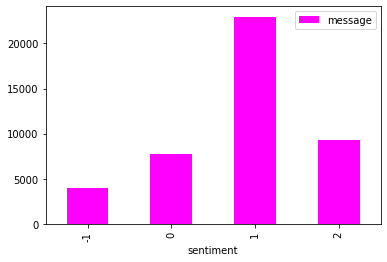

In [ ]:
data_sentimen.groupby('sentiment').count().plot(kind='bar', color='magenta')

In [7]:
values = [1,0]
data_sentimen = data_sentimen[data_sentimen.sentiment.isin(values) == False]
data_sentimen.sentiment.value_counts()

 2    9276
-1    3990
Name: sentiment, dtype: int64

In [8]:
for idx,row in data_sentimen.iterrows():
    row[0] = row[0].replace('rt',' ')

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxi_fetures=2000
token=Tokenizer(num_words=maxi_fetures, oov_token='x', split=' ')
token.fit_on_texts(data_sentimen['message'].values)
X = token.texts_to_sequences(data_sentimen['message'].values)
X = pad_sequences(X)

In [34]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [35]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=6000, output_dim=16),
    tf.keras.layers.LSTM(196),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          96000     
                                                                 
 lstm_7 (LSTM)               (None, 196)               166992    
                                                                 
 dropout_5 (Dropout)         (None, 196)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               25216     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 2)                 130       
                                                                 
Total params: 296,594
Trainable params: 296,594
Non-tr

In [36]:
Y=pd.get_dummies(data_sentimen['sentiment']).values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(10612, 34) (10612, 2)
(2654, 34) (2654, 2)


In [37]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(x_test, y_test), 
                    verbose=2,
                    callbacks=[callbacks])


Epoch 1/100
332/332 - 30s - loss: 0.3225 - accuracy: 0.8638 - val_loss: 0.1729 - val_accuracy: 0.9333 - 30s/epoch - 91ms/step
Epoch 2/100
332/332 - 30s - loss: 0.1456 - accuracy: 0.9431 - val_loss: 0.2014 - val_accuracy: 0.9152 - 30s/epoch - 91ms/step
Epoch 3/100
332/332 - 27s - loss: 0.1088 - accuracy: 0.9599 - val_loss: 0.1603 - val_accuracy: 0.9420 - 27s/epoch - 80ms/step
Epoch 4/100
332/332 - 27s - loss: 0.0886 - accuracy: 0.9682 - val_loss: 0.1723 - val_accuracy: 0.9367 - 27s/epoch - 81ms/step
Epoch 5/100

Akurasi telah mencapai >90%!
332/332 - 27s - loss: 0.0775 - accuracy: 0.9724 - val_loss: 0.1762 - val_accuracy: 0.9344 - 27s/epoch - 82ms/step


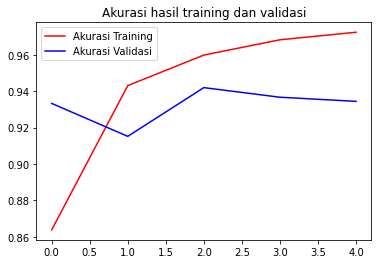

<Figure size 432x288 with 0 Axes>

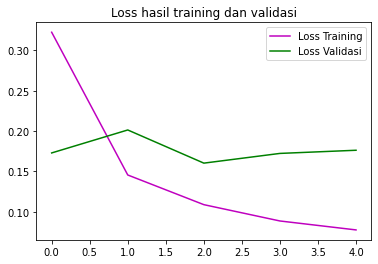

<Figure size 432x288 with 0 Axes>

In [38]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'm', label='Loss Training')
plt.plot(epochs, val_loss, 'g', label='Loss Validasi')
plt.title('Loss hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

In [39]:
_, train_acc = model.evaluate(x_train, y_train, verbose=2)
_, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

332/332 - 12s - loss: 0.0632 - accuracy: 0.9808 - 12s/epoch - 37ms/step
83/83 - 2s - loss: 0.1762 - accuracy: 0.9344 - 2s/epoch - 23ms/step
Train: 0.981, Test: 0.9344


In [40]:
ukuran_validasi=1500
batch_size = 40

message_validate = x_test[-ukuran_validasi:]
sentimen_validate = y_test[-ukuran_validasi:]
message_test = x_test[:-ukuran_validasi]
sentimen_test = y_test[:-ukuran_validasi]
score,acc = model.evaluate(message_test, sentimen_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc*100))

29/29 - 1s - loss: 0.1671 - accuracy: 0.9333 - 778ms/epoch - 27ms/step
score: 0.17
acc: 93.33
